In [ ]:
!pip install scipy

In [ ]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 2.7 MB/s 


In [ ]:
import sklearn
import skopt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import RepeatedKFold

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
# fix random seed for reproducibility
np.random.seed(5)

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving font_test.csv to font_test (1).csv
Saving font_train.csv to font_train (1).csv


In [ ]:
import pandas as pd
import io
train0 = pd.read_csv(io.BytesIO(uploaded['font_train.csv']))
test0 = pd.read_csv(io.BytesIO(uploaded['font_test.csv']))
train0.head()
train0.shape
test0.shape

(78, 40)

In [ ]:
#Clean the data
train0.isna().sum()
test0.isna().sum()

In [ ]:
#To see what data types we have(if we have categorical datatypes, encode them)
train0.dtypes
test0.dtypes

In [ ]:
train0.duplicated()
print(train0.duplicated().sum())

8


In [ ]:
test0.duplicated()
print(test0.duplicated().sum())

1


In [ ]:
#Inspect the data to see whether it needs to do normalization or not
train1_stats = train1.describe()
train1_stats = train1_stats.transpose()
train1_stats.head()

,count,mean,std,min,25%,50%,75%,max
input1,77.0,7.870130,7.347306,0.0,0.0,8.0,12.0,27.0
input2,77.0,11.389610,6.947464,0.0,9.0,11.0,15.0,31.0
input3,77.0,2.337662,2.552658,0.0,0.0,2.0,4.0,10.0
input4,77.0,2.558442,2.935686,0.0,0.0,2.0,4.0,12.0
input5,77.0,0.194805,0.973855,0.0,0.0,0.0,0.0,5.0


In [ ]:
#Normalization
train2=(train0 - train0.min())/(train0.max() - train0.min())
train2.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,Q,R,S,T,U,V,W,X,Y,Z
0,0.296296,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.259259,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.444444,0.322581,0.1,0.083333,0.0,0.000000,0.000,0.8,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,0.322581,0.4,0.333333,0.0,0.090909,0.125,0.0,0.555556,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.387097,0.3,0.250000,0.0,0.727273,0.000,1.0,0.000000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalization
test2=(test0 - train0.min())/(train0.max() - train0.min())
test2.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,Q,R,S,T,U,V,W,X,Y,Z
0,0.259259,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.259259,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.161290,0.0,0.500000,0.0,0.000000,1.125,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.451613,0.2,0.166667,0.0,0.727273,0.000,1.0,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.387097,0.2,0.166667,0.0,0.727273,0.000,1.0,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Normalization
#train2=(train1 - train1.min())/(train1.max() - train1.min())
#train2.head()

In [ ]:
#Normalization
#test2=(test1 - train1.min())/(train1.max() - train1.min())
#test2.head()

In [ ]:
#Split features from labels
#Separate the target values from the features. This targets are the values that we will train the model to predict.
train2_features = train2.copy()
test2_features = test2.copy()
train2_labels = train2_features.iloc[:, 14:40]

train2_features.drop(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'], axis = 1, inplace = True)
print(train2_features.shape)
print(train2_labels.shape)

(78, 14)
(78, 26)


In [ ]:
#Split features from labels
#Separate the target values from the features. This targets are the values that we will train the model to predict.
test2_features = test2.copy()
test2_labels = test2_features.iloc[:, 14:40]

test2_features.drop(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'], axis = 1, inplace = True)
print(test2_features.shape)
print(test2_labels.shape)

(78, 14)
(78, 26)


In [ ]:
# Change train and test datasets from matrix to array:
X_train = train2_features.to_numpy()
y_train = train2_labels.to_numpy()
X_test = test2_features.to_numpy()
y_test = test2_labels.to_numpy()
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

y_train= train2_labels
y_test= test2_labels
# Printing dimensions
print(X_train.shape, y_train.shape)

(78, 14) (78, 26)


In [ ]:
X_train[0].shape

(14,)

In [ ]:
#Define a model with a single layer
model = keras.Sequential([
                  keras.layers.Dense(26, input_shape=(14,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 5ms/step - loss: -0.7244 - accuracy: 0.0256
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: -0.8344 - accuracy: 0.0256
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: -0.9402 - accuracy: 0.0256
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: -1.0414 - accuracy: 0.0256
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: -1.1406 - accuracy: 0.0256
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: -1.2438 - accuracy: 0.0256
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: -1.3441 - accuracy: 0.0256
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: -1.4430 - accuracy: 0.0641
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: -1.5412 - accuracy: 0.0641
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: -1.6399 - accuracy: 0.0641
Epoch 11/50
3/3 [============

In [ ]:
#Evaluate model on the test dataset
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 7ms/step - loss: -3.5059 - accuracy: 0.1282


[-3.5058586597442627, 0.12820513546466827]

In [ ]:
#sample prediction
y_predicted = model.predict(X_test)
y_predicted[2]

array([0.07601583, 0.4537092 , 0.43642277, 0.29597253, 0.15798795,
       0.07947573, 0.67117137, 0.43142015, 0.13583308, 0.8494957 ,
       0.6678968 , 0.832185  , 0.60348904, 0.11200804, 0.22369573,
       0.06757528, 0.5559669 , 0.88929534, 0.29677683, 0.6702946 ,
       0.9051914 , 0.89692247, 0.30873224, 0.16228747, 0.5716726 ,
       0.9486872 ], dtype=float32)

In [ ]:
np.argmax(y_predicted[2])

13

In [ ]:
#To change y_predicted to concrete class labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 7, 13, 2, 2]

In [ ]:
#To improve model, we will add hidden layers
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import initializers
model = keras.Sequential([
                  keras.layers.Dense(20, input_shape=(14,), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-4),
                  kernel_initializer = tf.keras.initializers.HeUniform(),
                  name="dense_1"),
                  keras.layers.Dense(20, input_shape=(14,), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-4),
                  kernel_initializer = tf.keras.initializers.HeUniform(),
                  name="dense_2"),
                  keras.layers.Dense(26, activation='sigmoid',kernel_initializer = tf.keras.initializers.GlorotUniform())
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 3.2829 - accuracy: 0.1026
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 3.2681 - accuracy: 0.1026
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 3.2557 - accuracy: 0.1026
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 3.2443 - accuracy: 0.1026
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 3.2332 - accuracy: 0.1154
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 3.2221 - accuracy: 0.1154
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 3.2117 - accuracy: 0.1154
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 3.2012 - accuracy: 0.1154
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 3.1906 - accuracy: 0.1154
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 3.1802 - accuracy: 0.1154
Epoch 11/200
3/3 [===========

In [ ]:
#Evaluate model on the test dataset
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.1658 - accuracy: 0.7821


[1.1658493280410767, 0.7820512652397156]

In [ ]:
#sample prediction
y_predicted = model.predict(X_test)
y_predicted[1]

array([9.9606371e-01, 2.8264821e-03, 2.1687150e-02, 4.2423308e-03,
       3.3388704e-02, 7.2450042e-03, 4.8865080e-03, 1.6748667e-02,
       5.5466872e-01, 3.5594705e-01, 1.2405217e-03, 3.4774429e-01,
       3.4618378e-03, 6.7695975e-04, 7.5042248e-04, 3.8160205e-02,
       1.4999402e-01, 3.6212504e-03, 4.1759014e-04, 7.9021764e-01,
       6.2259883e-02, 4.0396422e-02, 1.8533167e-01, 6.8531976e-05,
       7.3544681e-03, 2.9481053e-01], dtype=float32)

In [ ]:
#Check Training History
# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [ ]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

In [ ]:
#Run Scikit-Optimizer
import warnings
warnings.filterwarnings('ignore')

results_gp = skopt.gp_minimize(objective,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          n_initial_points=10,      # the starting point        ###acq_func="LCB",     # the acquisition function (optional)                          
                          n_calls=10,         # the number of evaluations of f including at x0                          
                          random_state=0)

# summarize performance
###print('MSE mean and std: %.3f (%.3f)' % (np.mean(results), np.std(results)))

In [ ]:
results_gp

          fun: -16.18962852160136
    func_vals: array([-15.40254768, -14.40351731, -13.41413085, -16.18962852,
       -14.2598985 , -14.14933236, -13.39249825, -14.31138388,
       -15.38003262, -13.49453115])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=209652396)]
 random_state: RandomState(MT19937) at 0x7F3E126B08D0
        space: Space([Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Real(low=0.0, high=0.5, prior='uniform', transform='normalize')])
        specs: {'args': {'func': <function objective at 0x7f3e130cee60>, 'dimensions': Space([Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Integer(low=20, high=24, prior='uniform', transform='normalize'),
       Re

In [ ]:
#Get Best Parameter Set
"Best score=%.4f" % results_gp.fun

print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp.x[0], results_gp.x[1],
                            results_gp.x[2]))

Best parameters:
- dense_0_neurons=22
- dense_1_neurons=23
- dropout_rate=0.239989


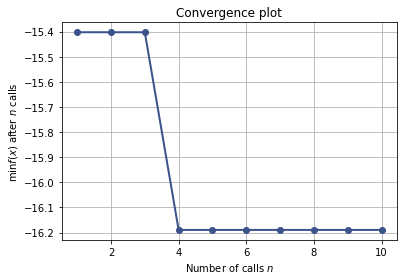

In [ ]:
#Convergence Plot
from skopt.plots import plot_convergence
plot_convergence(results_gp)